In [1]:
import pandas as pd
df=pd.read_csv("driver-data.csv")
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [2]:
x=df.iloc[:,1:3].values
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_out=ss.fit_transform(x)
ss_out

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [15]:
from sklearn.cluster import KMeans
k=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(ss_out)
    k.append(km.inertia_)
k


[8000.0,
 3911.926390428412,
 1756.5445821314263,
 739.1534508645559,
 619.4037594867996,
 502.03685490351063,
 438.7173132821579,
 374.5855317163617,
 337.8739841380278,
 305.38983728598953]

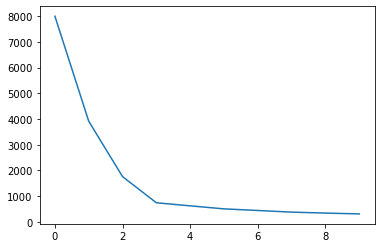

In [16]:
import matplotlib.pyplot as plt
plt.plot(k)

In [28]:
km=KMeans(n_clusters=4,init="k-means++",random_state=0)
s=km.fit_predict(ss_out)
s

array([2, 2, 2, ..., 1, 1, 1])

In [32]:
df["result"]=pd.DataFrame(s)
df.head()

,id,mean_dist_day,mean_over_speed_perc,result
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2


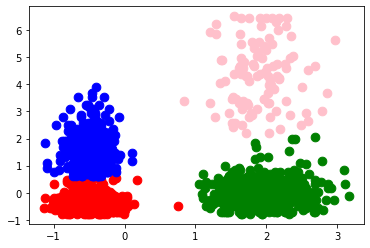

In [33]:
plt.scatter(x[s==0,0],x[s==0,1],s=75,c="r")
plt.scatter(x[s==1,0],x[s==1,1],s=75,c="green")
plt.scatter(x[s==2,0],x[s==2,1],s=75,c="blue")
plt.scatter(x[s==3,0],x[s==3,1],s=75,c="pink")
plt.scatter(x[s==4,0],x[s==4,1],s=75,c="black")